In [ ]:
# source  https://www.youtube.com/watch?v=Xvwt7y2jf5E&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=24

In [ ]:
# k means clustering 
# here k means number of clusters
###############
# how to decide number of clusters by elbow point value 

In [ ]:
# order
# elbow point
# measure the distance
# grouping
# reposition the centroids
# convergence

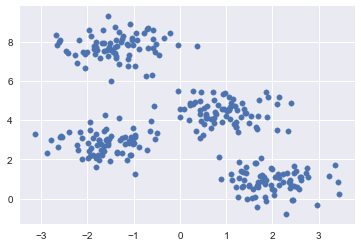

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
X , y_true = make_blobs(n_samples = 300 , centers = 4 , cluster_std = 0.60 , random_state = 0)
plt.scatter(X[:,0],X[:,1],s= 30)

In [21]:
X.shape

(300, 2)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [24]:
X.shape

(300, 2)

In [23]:
y_kmeans

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0, 3,
       1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3, 1, 1,
       2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1, 2, 0, 2,
       1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3, 2, 2, 3, 0,
       2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3, 1, 1, 0, 2, 0,
       3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2,
       3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3, 0, 1, 2, 1, 0, 3, 2,
       3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2, 0, 0, 3, 1, 0, 3, 1, 1,
       3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3, 1, 2, 3, 1, 0, 1, 3, 2, 1,
       2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 2, 2, 3,
       3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3, 0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0,
       3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0, 2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0,
       0, 3, 2, 2, 0, 0, 3, 0, 0, 0, 2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2,
       1])

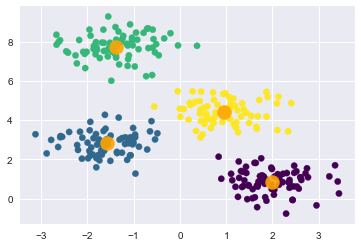

In [32]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters , rseed = 2):
    # 1. randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. assign labels based on closest center
        labels = pairwise_distances_argmin(X , centers)
        
        # 2b. find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) 
                               for i in range(n_clusters)])
        # 2c. check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers , labels

centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c = y_kmeans , s= 40 ,cmap = 'viridis')
plt.scatter(centers[:,0],centers[:,1],c='orange', s=200 ,alpha = 0.9)
        
    